<a href="https://colab.research.google.com/github/Dh-arch1923/My-Work/blob/main/SVM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
mushroom=pd.read_csv('/content/mushroom.csv')
mushroom[0:4]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692


In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [3]:
#Dropping the unessary column
mushroom.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
mushroom.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


Determining the Null Values

In [ ]:
mushroom.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


Determining the Duplicates

In [ ]:
mushroom.duplicated().sum()
mushroom.dtypes

,0
cap_shape,object
cap_surface,object
cap_color,object
bruises,object
odor,object
gill_attachment,object
gill_spacing,object
gill_size,object
gill_color,object
stalk_shape,object


In [4]:
#Identify all object columns
cat_col=mushroom.select_dtypes(include=['object']).columns
#Allpy the label encoder for each of the column
from sklearn.preprocessing import LabelEncoder
label_encoder={}
for col in cat_col:
  le=LabelEncoder()
  mushroom[col]=le.fit_transform(mushroom[col])
  label_encoder[col]=le
print(mushroom.head())

   cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0             2          0           7            1  ...          0   
1             1          1           3            0  ...          1   
2             1          0           8            1  ...          1   
3             0          0           6            0  ...          0   
4             1          1           6            0  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3   

In [ ]:
mushroom.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [5]:
#I am converting my target column into discrete
mushroom['stalk_height_descrete']=np.round(mushroom['stalk_height'],0)
mushroom['cap_diameter_descrete']=np.round(mushroom['cap_diameter'],0)
mushroom[0:4]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter,stalk_height_descrete,cap_diameter_descrete
0,4,2,7,0,1,1,2,0,7,1,...,2,6,3,1,5,1,14.276173,5.054983,14.0,5.0
1,4,0,6,0,1,3,1,1,3,0,...,2,6,1,2,5,0,3.952715,19.068319,4.0,19.0
2,3,1,5,1,4,1,1,0,8,1,...,2,6,6,0,5,1,9.054265,7.205884,9.0,7.0
3,0,2,4,1,3,3,0,0,6,0,...,2,0,4,1,0,1,5.226499,20.932692,5.0,21.0


In [6]:
#now drop the column original column that you had dedcreated
mushroom.drop(['stalk_height','cap_diameter'],axis=1,inplace=True)

In [ ]:
mushroom[0:4]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height_descrete,cap_diameter_descrete
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.0,5.0
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,4.0,19.0
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.0,7.0
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.0,21.0


In [7]:
#Now divide the data into train and test
x=mushroom.iloc[:,:23] #indipendent variables
y=mushroom.iloc[:,23] #dependent variable
y

,stalk_height_descrete
0,14.0
1,4.0
2,9.0
3,5.0
4,14.0
...,...
1995,6.0
1996,7.0
1997,14.0
1998,11.0


In [8]:
#Noe scale the value of the indendent variables
scalr=StandardScaler()
X=scalr.fit_transform(x)
X

array([[ 1.35664266,  0.39842442,  1.19496641, ..., -0.8418839 ,
         0.97916574,  0.65465367],
       [ 1.35664266, -1.39628018,  0.81416131, ..., -0.2644601 ,
         0.97916574, -1.52752523],
       [ 0.66003539, -0.49892788,  0.43335621, ..., -1.4193077 ,
         0.97916574,  0.65465367],
       ...,
       [-0.03657188, -0.49892788, -0.328254  , ..., -1.4193077 ,
         1.4865055 ,  0.65465367],
       [-1.42978643,  1.29577672,  1.19496641, ...,  1.4678113 ,
         1.4865055 ,  0.65465367],
       [-0.03657188,  0.39842442,  1.57577151, ..., -0.2644601 ,
         0.47182598,  0.65465367]])

In [9]:
#Now split the data foer test and train
X_test,X_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=0)
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((1600, 23), (1600,), (400, 23), (400,))

In [10]:
#Before putting the train data into the model just try with the sample values to get optimal value for kernel,gamma,c
svv=SVC()
print(svv)
test_parameter=[{'kernel':['rbf','sigmoid'],'gamma':[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'C':[20,19,18,17,16,15,14,13,12,11,10]}]
model=GridSearchCV(svv,test_parameter)
model.fit(x,y)

SVC()


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
                          'gamma': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                    0.8, 0.9, 1],
                          'kernel': ['rbf', 'sigmoid']}])

In [11]:
model.best_params_,model.best_score_

({'C': 14, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7394999999999999)

accuracy score is: 100.0
[[14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11]]


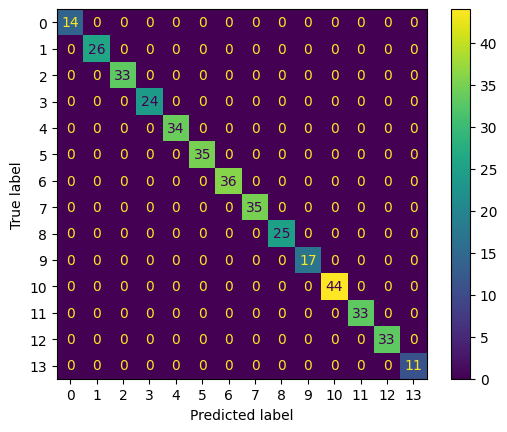

In [14]:
svv=SVC(kernel='rbf',gamma=0.01,C=14)
svv.fit(X_train,y_train)
y_pred_train=svv.predict(X_train)
acc=accuracy_score(y_train,y_pred_train)*100
print('accuracy score is:',acc)
#Create the confustion matrics
cm=confusion_matrix(y_train,y_pred_train)
print(cm)
display=ConfusionMatrixDisplay(cm)
display.plot()

In [13]:
#Now Choose the another Column as Target
#Now divide the data into train and test
x=mushroom.iloc[:,:23] #indipendent variables
y=mushroom.iloc[:,24] #dependent variable
y

,cap_diameter_descrete
0,5.0
1,19.0
2,7.0
3,21.0
4,13.0
...,...
1995,17.0
1996,14.0
1997,11.0
1998,8.0


In [15]:
#Now split the data foer test and train
X_test,X_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=0)
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((1600, 23), (1600,), (400, 23), (400,))

In [16]:
#Before putting the train data into the model just try with the sample values to get optimal value for kernel,gamma,c
svv=SVC()
print(svv)
test_parameter=[{'kernel':['rbf','sigmoid'],'gamma':[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'C':[20,19,18,17,16,15,14,13,12,11,10]}]
model=GridSearchCV(svv,test_parameter)
model.fit(x,y)

SVC()


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
                          'gamma': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                    0.8, 0.9, 1],
                          'kernel': ['rbf', 'sigmoid']}])

In [17]:
model.best_params_,model.best_score_

({'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}, 0.7350000000000001)

accuracy score is: 100.0
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  

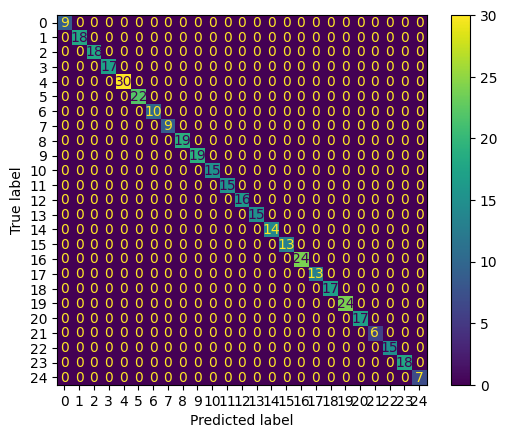

In [18]:
svv=SVC(kernel='rbf',gamma=0.1,C=20)
svv.fit(X_train,y_train)
y_pred_train=svv.predict(X_train)
acc=accuracy_score(y_train,y_pred_train)*100
print('accuracy score is:',acc)
#Create the confustion matrics
cm=confusion_matrix(y_train,y_pred_train)
print(cm)
display=ConfusionMatrixDisplay(cm)
display.plot()

Here I have two target parameters(dependent column) so I had had taken first column and treat it in the model and got result and then I inser the second column and treat it in the model and got the result.